# Goals

menganalisis data tentang iklan mobil, tentang faktor apa saja yang mempengaruhi harga penjualan mobil

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/vehicles_us.csv')

In [3]:
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [4]:
#melihat column dan tipe datanya dan melihat juga apakah ada nilai yang null atau tidak 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
#menganalisis data dengan nilai yang hilang
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

## Tahap 1 EDA, mengisi data yang nilainya hilang

In [6]:
model_year_dict = data.groupby('model').agg({'cylinders':'median','model_year':'median'})
model_year_dict

,cylinders,model_year
model,,
acura tl,6.0,2007.0
bmw x5,6.0,2010.0
buick enclave,6.0,2012.0
cadillac escalade,8.0,2009.0
chevrolet camaro,6.0,2013.0
...,...,...
toyota sienna,6.0,2008.0
toyota tacoma,6.0,2010.0
toyota tundra,8.0,2009.0


membuat dictionary berdasarkan model mobil, nantinya nilai yang hilang di cylinders dan model_year akan diambil dari sini karena disini data model tidak ada nilai yang hilang, dan saya menggunakan median karena mencari nilai tengah yang tidak jauh dan bisa digunakan untuk perkiraan mengisi data yang hilang


In [7]:
#mengisi nilai model_year yang hilang
for model in data['model'].unique():
    data.loc[(data['model']==model)&data['model_year'].isna(),'model_year']=\
    model_year_dict.loc[model_year_dict.index==model,'model_year'][0]
    

membuat fungsi yang mengisi nilai model_year yang bernilai NaN dengan menggunakan dictionary model_year_dict yang dibuat sebelumnya, nantinya data model_year ini akan diisi berdasarkan nilai model_year di dictionary

In [8]:
#mengisi nilai cylinders yang hilang
for model in data['model'].unique():
    data.loc[(data['model']==model)&(data['cylinders'].isna()),'cylinders']=\
    model_year_dict.loc[model_year_dict.index==model,'cylinders'][0]

membuat fungsi yang mengisi nilai cylinders yang bernilai NaN dengan menggunakan dictionary model_year_dict yang dibuat sebelumnya, nantinya data model_year ini akan diisi berdasarkan nilai cylinders di dictionary

In [9]:
#membuat dictionary odometer
odo_dict = data.groupby('condition').agg({'odometer':'median'})
odo_dict

,odometer
condition,
excellent,104230.0
fair,181613.0
good,129000.0
like new,72982.5
new,8002.0
salvage,142673.5


In [10]:
#mengisi nilai odometer yang hilang berdasarkan dictionary odometer
for condition in data['condition'].unique():
    data.loc[(data['condition']==condition)&(data['odometer'].isna()),'odometer']=\
    odo_dict.loc[odo_dict.index==condition,'odometer'][0]

untuk nilai odometer yang kosong patokan saya berdasarkan kondisi, saya mencari median dari setiap kondisi yang ada lalu nilanya ini digunakan untk mengisi nilai iklan kendaraan yang odometernya NaN

In [11]:
#mengisi nilai paint_color
data['paint_color'] = data['paint_color'].fillna('unknown')
data
#karena mengisi parameter warna itu sulit dan banyak faktor yang mempengaruhi jadi saya mengisi nilai yang hilang dengan unknown

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [12]:
#mengisi is_4wd
data['is_4wd'] = data['is_4wd'].fillna(0)

In [13]:
#sudah tidak ada nilai null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [14]:
#mengubah tipe data agar lebih sesuai
data['model_year'] = data['model_year'].astype('int')
data['is_4wd'] =  data['is_4wd'].astype('int')
data['date_posted'] = pd.to_datetime(data['date_posted'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int32         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(6)
memory usage: 4.7+ MB


In [15]:
#menambahkan Hari dalam minggu, bulan, dan tahun iklan ditayangkan
data['days'] = data['date_posted'].dt.day
data['month'] = data['date_posted'].dt.month
data['year'] = data['date_posted'].dt.year


In [16]:
#menambahkan Usia kendaraan (dalam tahun) ketika iklan ditayangkan
data['car_age'] = data['year']-data['model_year']


In [17]:
#menambahkan Jarak tempuh rata-rata kendaraan per tahun
data['travel_avg'] = data['odometer']/data['car_age']

Mengganti condition dengan skala
Pada kolom condition, ganti nilai string dengan skala numerik:
new = 5
like new = 4
excellent = 3
good = 2
fair = 1
salvage = 0

In [18]:
condition_dict = {
                    'new' : 5,
                    'like new': 4,
                    'excellent' : 3,
                    'good' : 2,
                    'fair' : 1,
                    'salvage' : 0
}
data['condition'] = data['condition'].map(condition_dict)

data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days,month,year,car_age,travel_avg
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,23,6,2018,7,20714.285714
1,25500,2011,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,19,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,7,2,2019,6,18333.333333
3,1500,2003,ford f-150,1,8.0,gas,181613.0,automatic,pickup,unknown,0,2019-03-22,9,22,3,2019,16,11350.812500
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2,4,2019,2,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6.0,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,3,10,2018,5,17627.200000
51521,2700,2002,honda civic,0,4.0,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,14,11,2018,16,11343.750000
51522,3950,2009,hyundai sonata,3,4.0,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,15,11,2018,9,14222.222222
51523,7455,2013,toyota corolla,2,4.0,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,2,7,2018,5,27914.600000


# Data analysis

Pelajari parameter berikut: harga, usia kendaraan saat iklan ditayangkan, jarak tempuh, jumlah silinder, dan kondisi. Buatlah histogram untuk setiap parameter tersebut. Pelajari bagaimana outlier memengaruhi bentuk dan keterbacaan histogram.

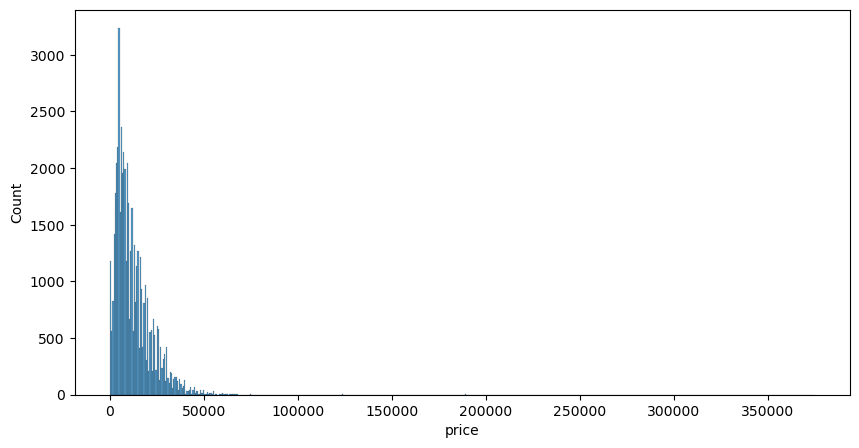

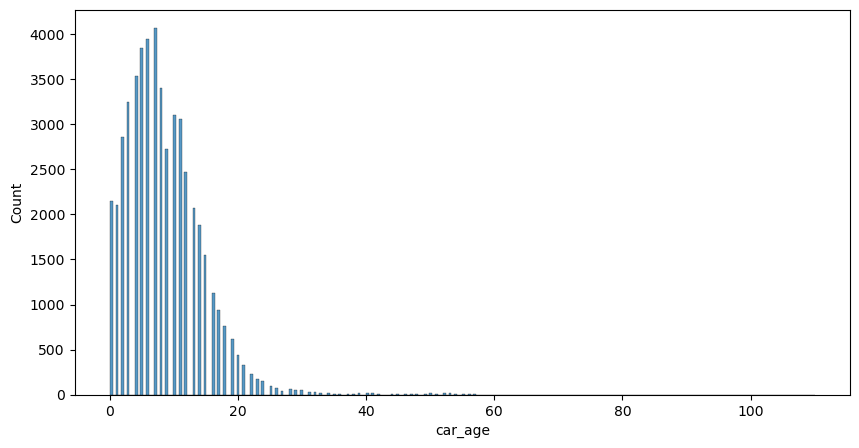

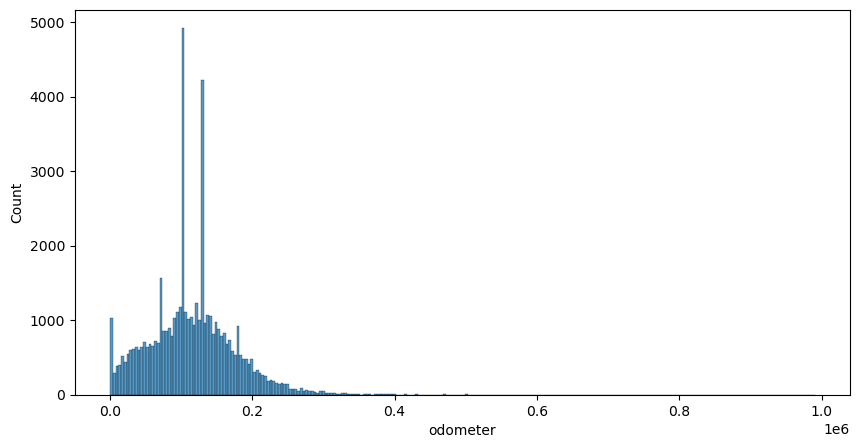

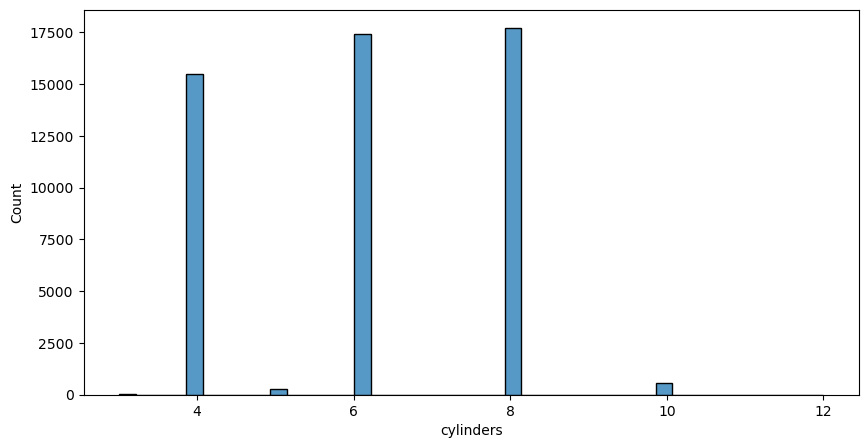

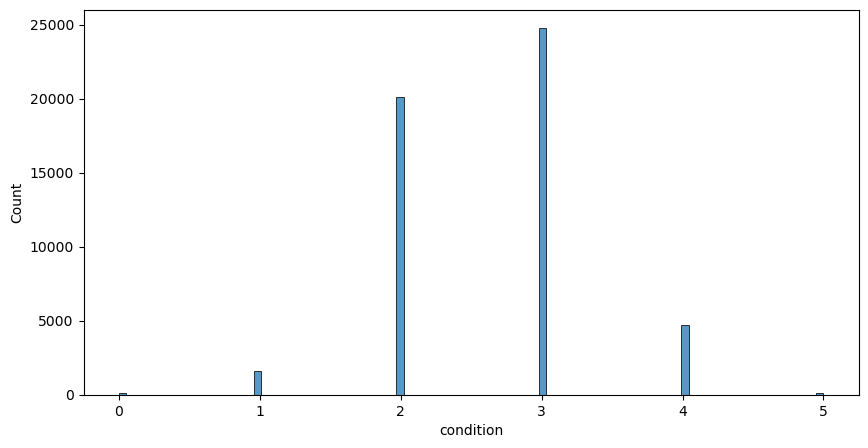

In [19]:
param = ['price','car_age','odometer','cylinders','condition']

for i in param:
    plt.figure(figsize=(10,5))
    sns.histplot(data,x=i)
    plt.show()
    

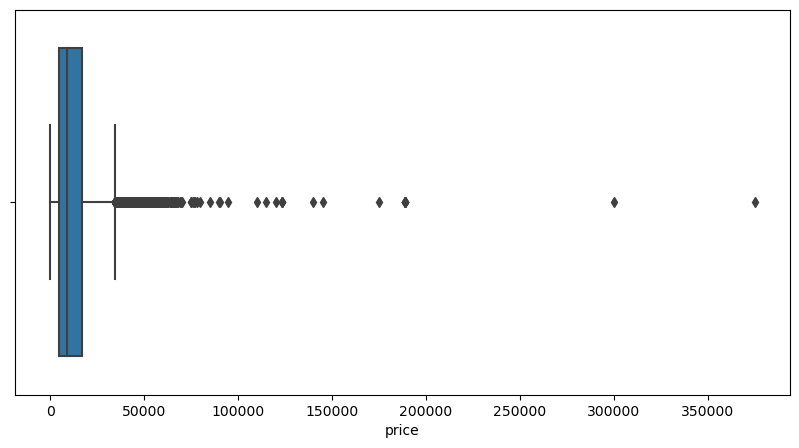

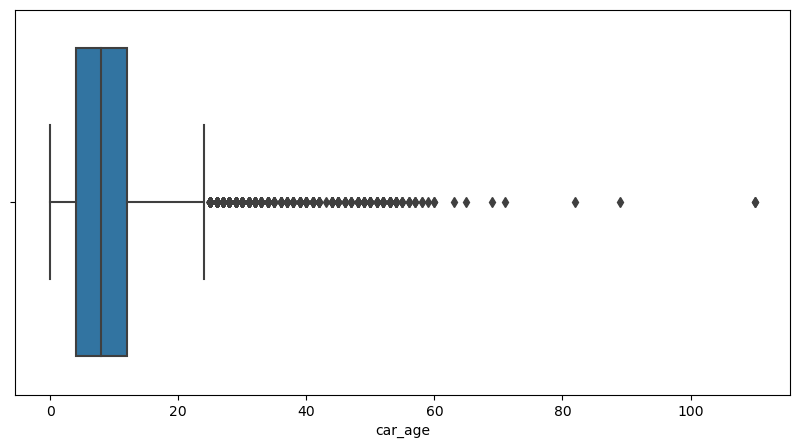

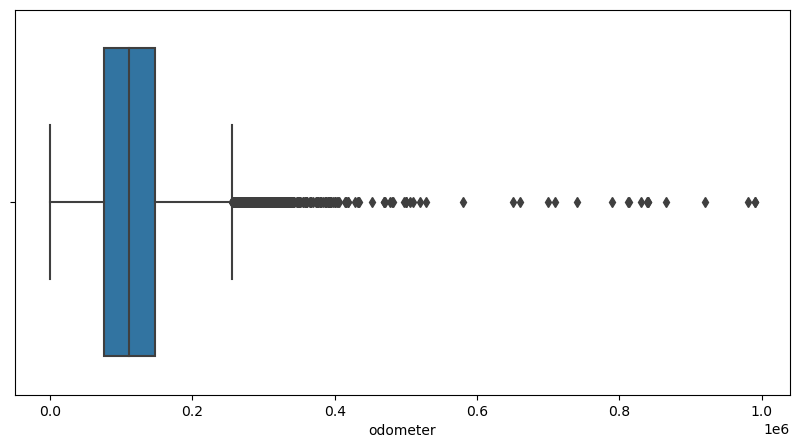

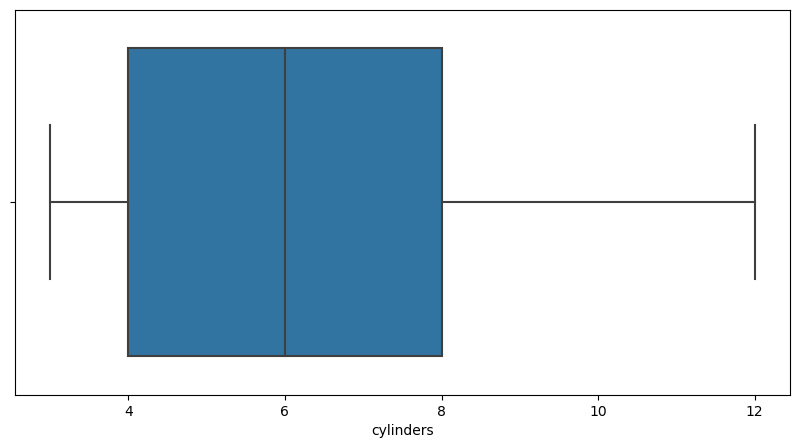

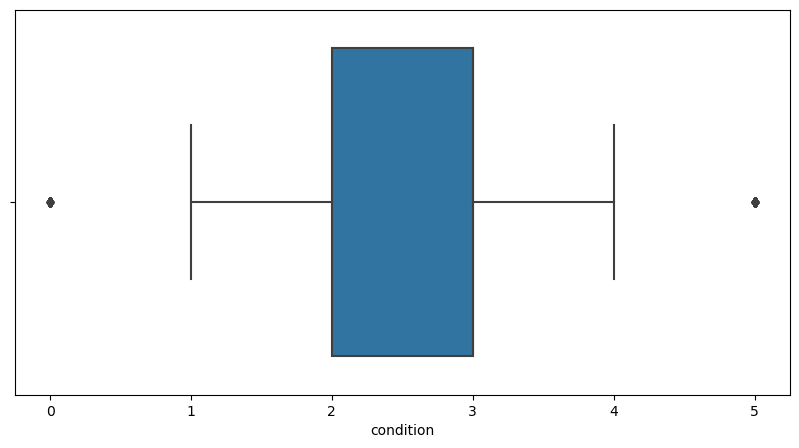

In [20]:
for i in param:
    plt.figure(figsize=(10,5))
    sns.boxplot(data = data,x=i)
    plt.show()


Tentukan batas atas outlier, hapus outlier, dan simpan di DataFrame yang terpisah, lalu lanjutkan pekerjaan Anda dengan data yang telah difilter.

In [52]:
"""
def clean_outlier(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    
     # Create new column
    new_col = col + '_clean'
    data[new_col] = data[col]
    
    # Remove outliers
    data.loc[(data[new_col] > upper) | (data[new_col] < lower), new_col] = None
    
    return data"""

"\ndef clean_outlier(data,col):\n    q1 = data[col].quantile(0.25)\n    q3 = data[col].quantile(0.75)\n    iqr = q3-q1\n    upper = q3 + 1.5*iqr\n    lower = q1 - 1.5*iqr\n    \n     # Create new column\n    new_col = col + '_clean'\n    data[new_col] = data[col]\n    \n    # Remove outliers\n    data.loc[(data[new_col] > upper) | (data[new_col] < lower), new_col] = None\n    \n    return data"

In [22]:
lower_bounds=[]
upper_bounds=[]
for i in param:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr  = q3-q1
    
    lower_bound = q1-(1.5*iqr)
    upper_bound = q3+(1.5*iqr)
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

In [23]:
upper_bounds

[34597.5, 24.0, 256050.5, 14.0, 4.5]

In [24]:
data_no_outlier = data.copy()
for n, col in enumerate(param):
    data_no_outlier= data_no_outlier[(data_no_outlier[col]>=lower_bounds[n]) & (data_no_outlier[col]<=upper_bounds[n])]
    

In [25]:
data_no_outlier['price'].max()

34595

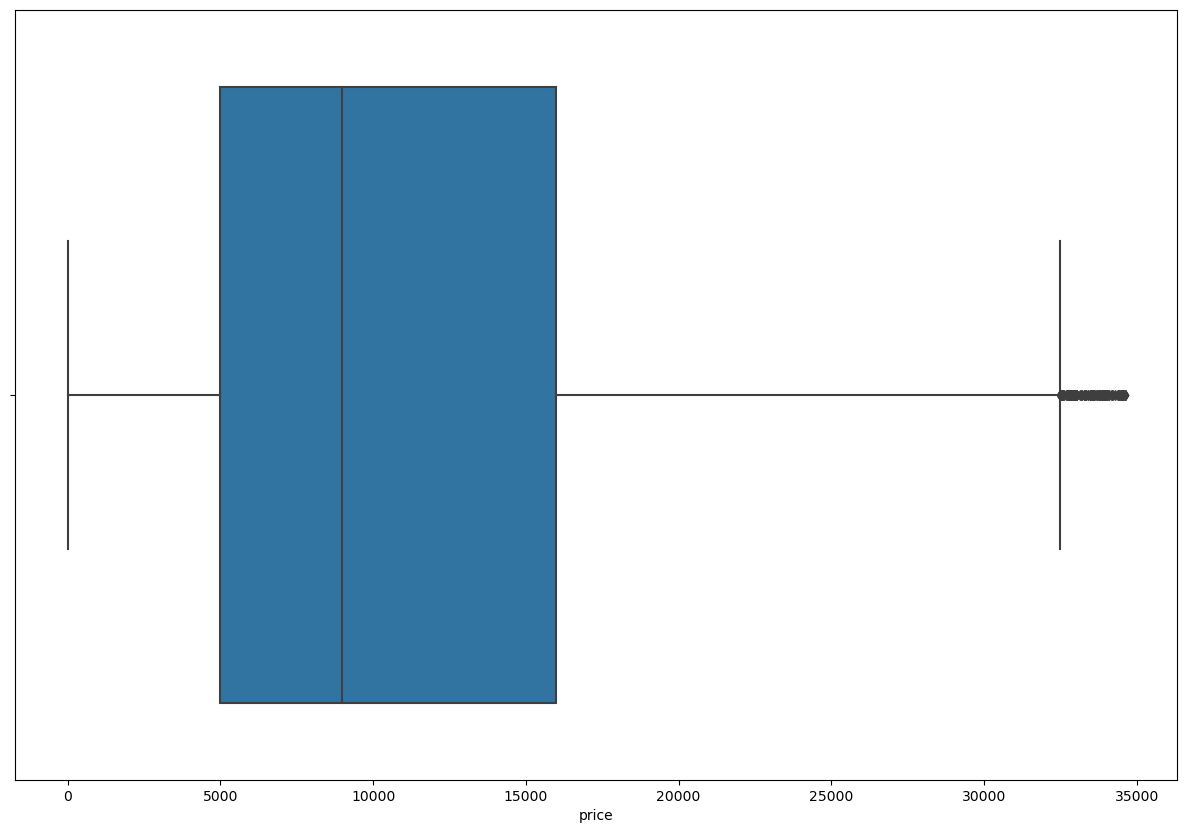

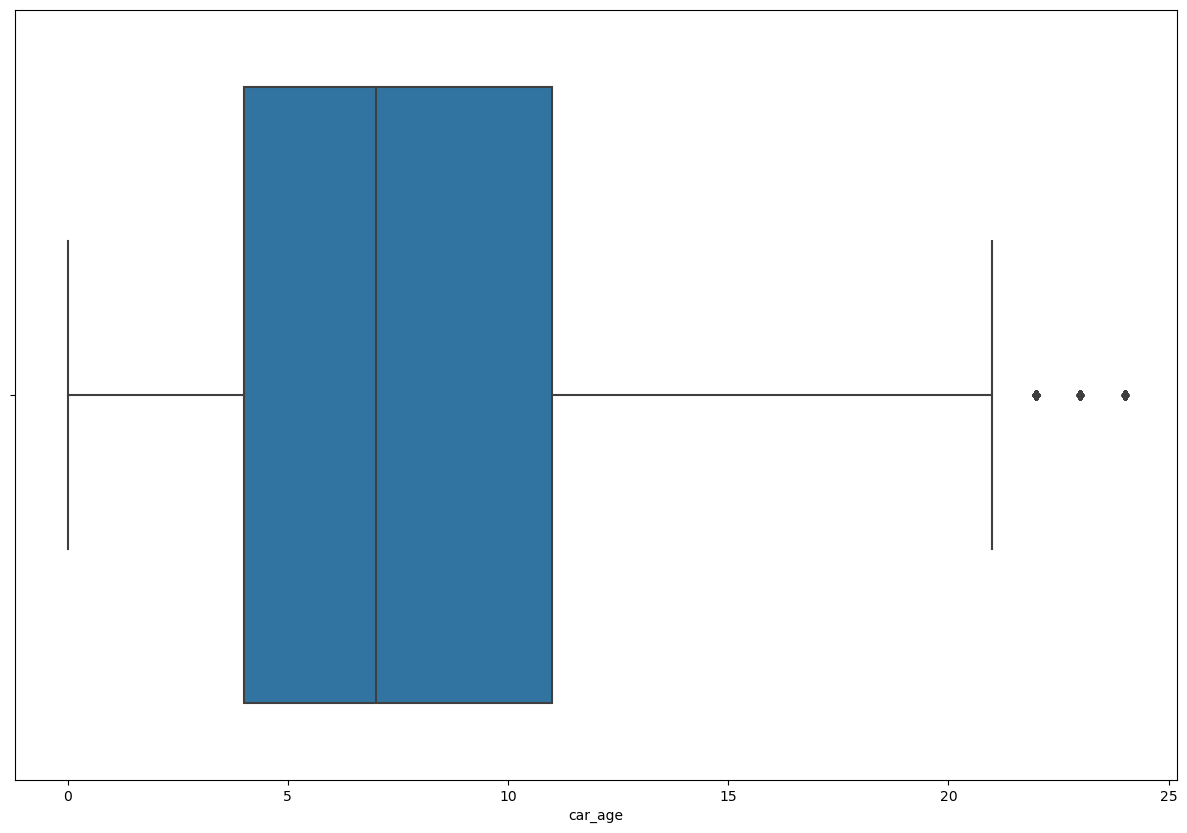

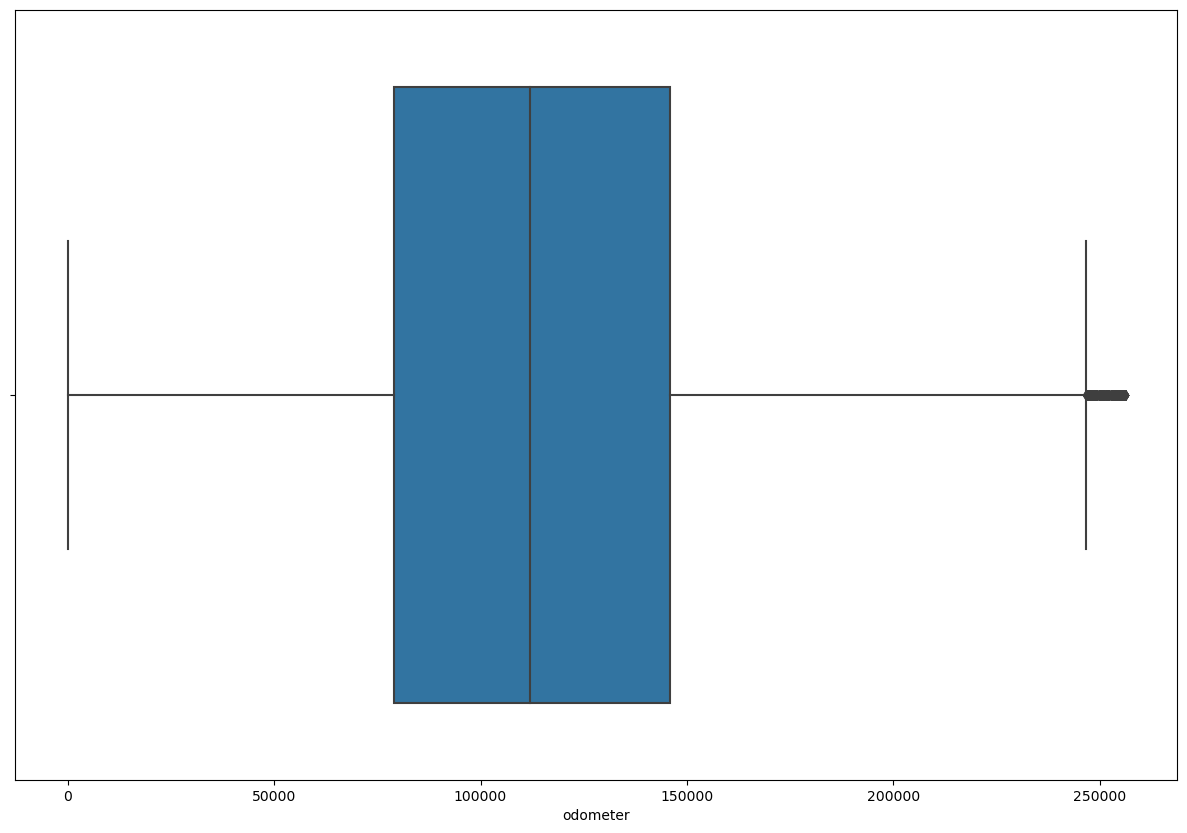

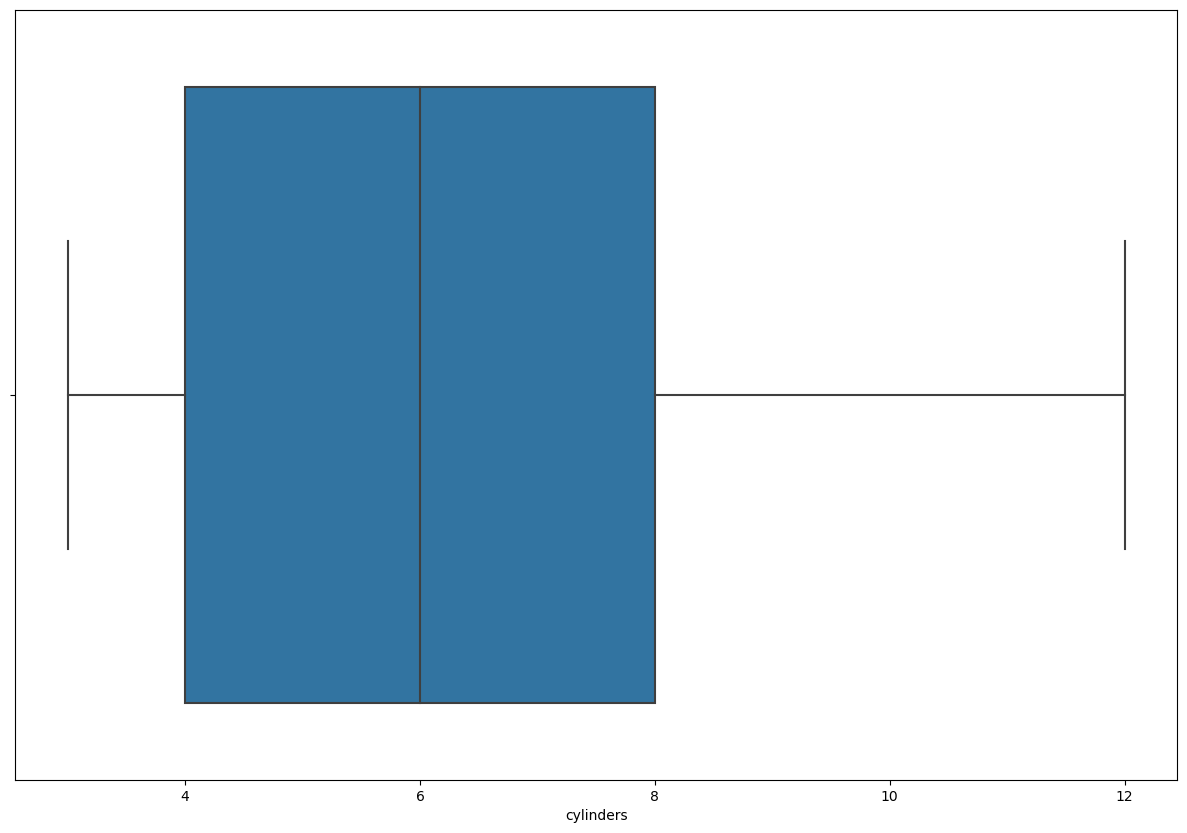

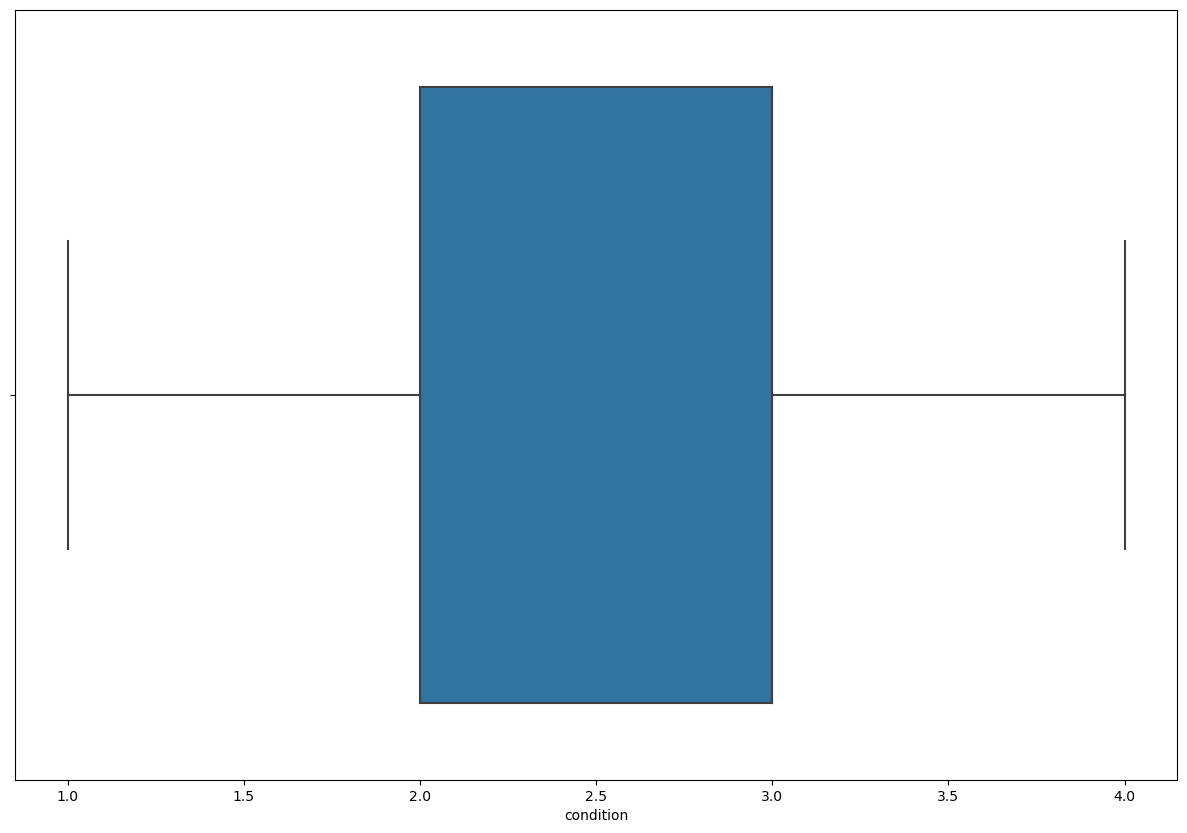

In [26]:
#membuat histogram tanpa outlier data
for i in param:
    plt.figure(figsize=(15,10))
    sns.boxplot(data=data_no_outlier,x=i)
    plt.show()

In [27]:
#melihat jumlah iklan, rata rata dan median ditayangkan
data_no_outlier['days_listed'].describe()

count    48092.000000
mean        39.545080
std         28.227846
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

# Analisis kendaraan

### Analisis berdasarkan faktor kategorikal (paint_color,model,transmission)

In [28]:
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days,month,year,car_age,travel_avg
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,23,6,2018,7,20714.285714
1,25500,2011,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,19,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,7,2,2019,6,18333.333333
3,1500,2003,ford f-150,1,8.0,gas,181613.0,automatic,pickup,unknown,0,2019-03-22,9,22,3,2019,16,11350.812500
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2,4,2019,2,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6.0,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,3,10,2018,5,17627.200000
51521,2700,2002,honda civic,0,4.0,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,14,11,2018,16,11343.750000
51522,3950,2009,hyundai sonata,3,4.0,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,15,11,2018,9,14222.222222
51523,7455,2013,toyota corolla,2,4.0,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,2,7,2018,5,27914.600000


<AxesSubplot:xlabel='type', ylabel='model'>

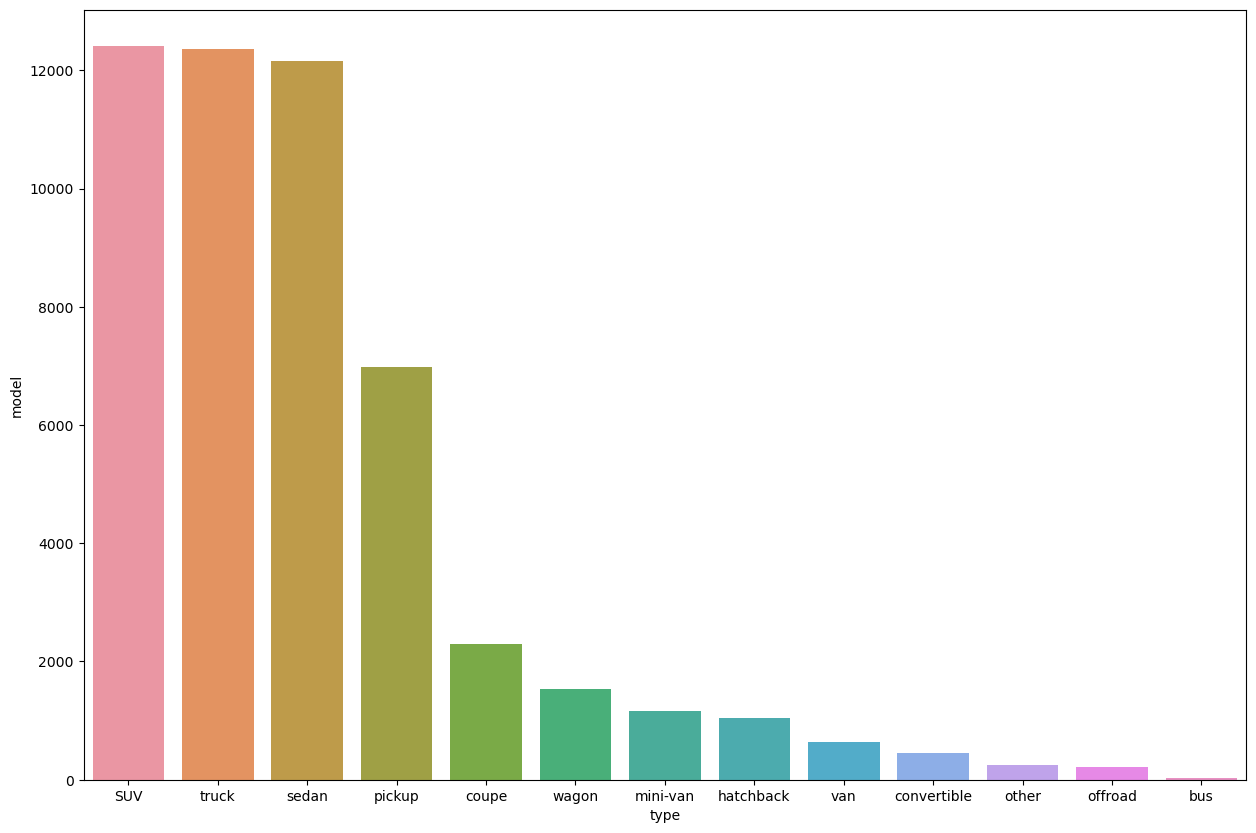

In [29]:
#melihat tipe kendaraan paling banyak diiklan disitus
iklan_count = data.groupby('type')['model'].count().reset_index().sort_values(by='model',ascending = False)
plt.figure(figsize=(15,10))
sns.barplot(data=iklan_count,x='type',y='model')

<AxesSubplot:xlabel='type', ylabel='price'>

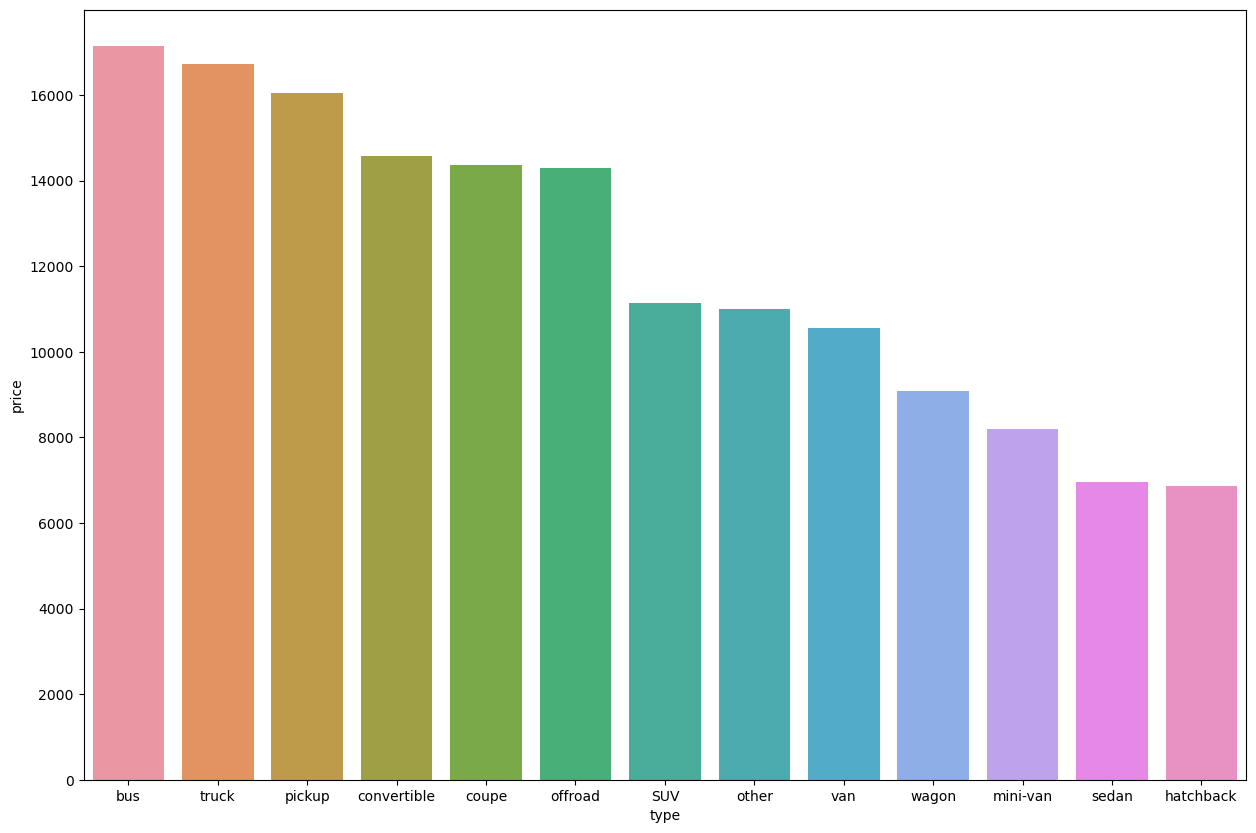

In [30]:
#rata-rata harga kendaraan
mean_price = data.groupby('type').agg({'price':'mean'}).reset_index().sort_values(by='price',ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(data=mean_price,x='type',y='price')


In [31]:
#jumlah 2 kendaraan terbanyak di situs adalah SUV dan truck mari buat dataset hanya khusus berisi data kendaraan ini
data_suv = data[data['type']=='SUV']
data_truck = data[data['type']=='truck']

In [32]:
#melihat pengaruh warna pada 2 jenis kendaraan terbanyak
suv_color = data_suv.groupby('paint_color').agg({'model':'count'}).sort_values(by='model',ascending=False)
suv_color

,model
paint_color,
unknown,2236
black,2220
white,1962
silver,1558
grey,1183
blue,1055
red,906
green,436
brown,369


<AxesSubplot:xlabel='price', ylabel='paint_color'>

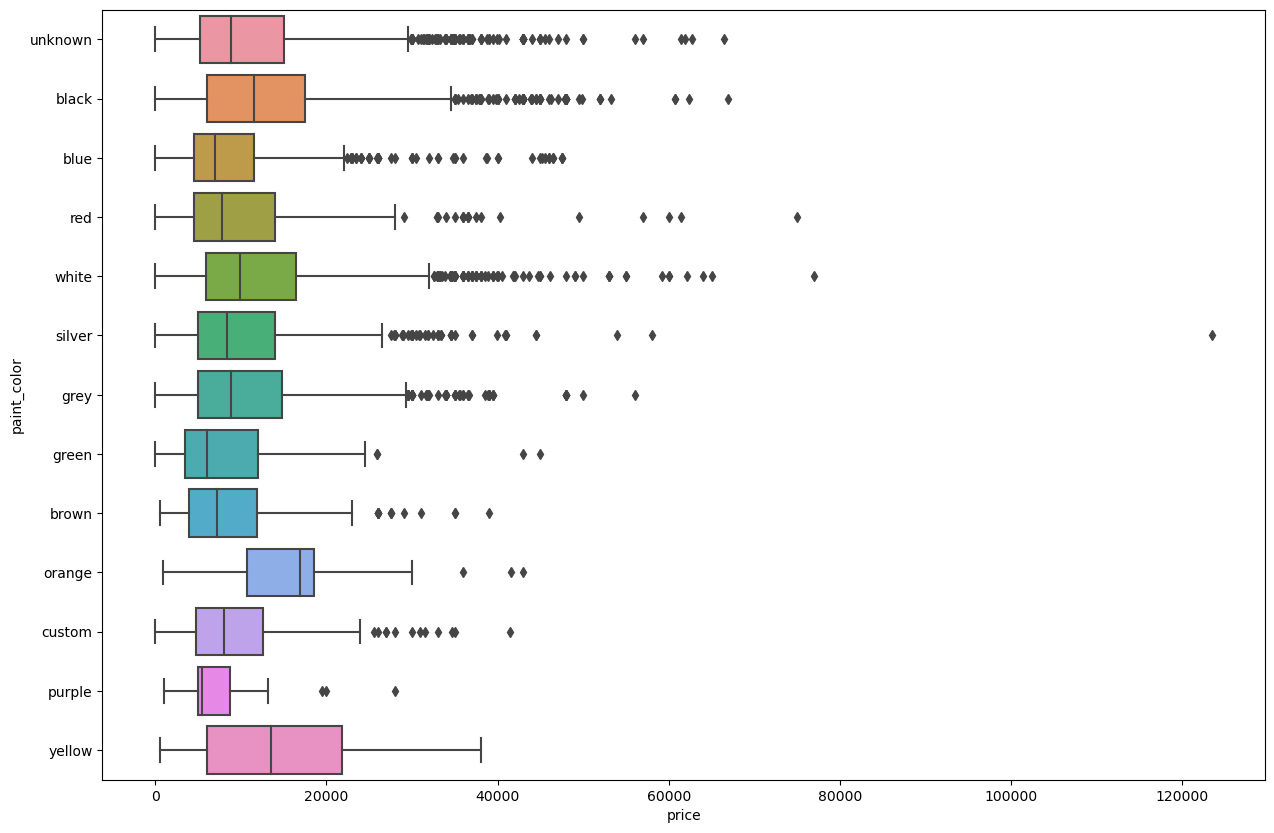

In [33]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data_suv,x='price',y='paint_color')

In [34]:
#mengelompokkan mobil suv berdasarkan transmisi untuk melihat harganya
transmission_mean = data_suv.groupby('transmission')['price'].mean()
transmission_mean

transmission
automatic    11173.097571
manual       11670.949020
other         7748.893750
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='transmission'>

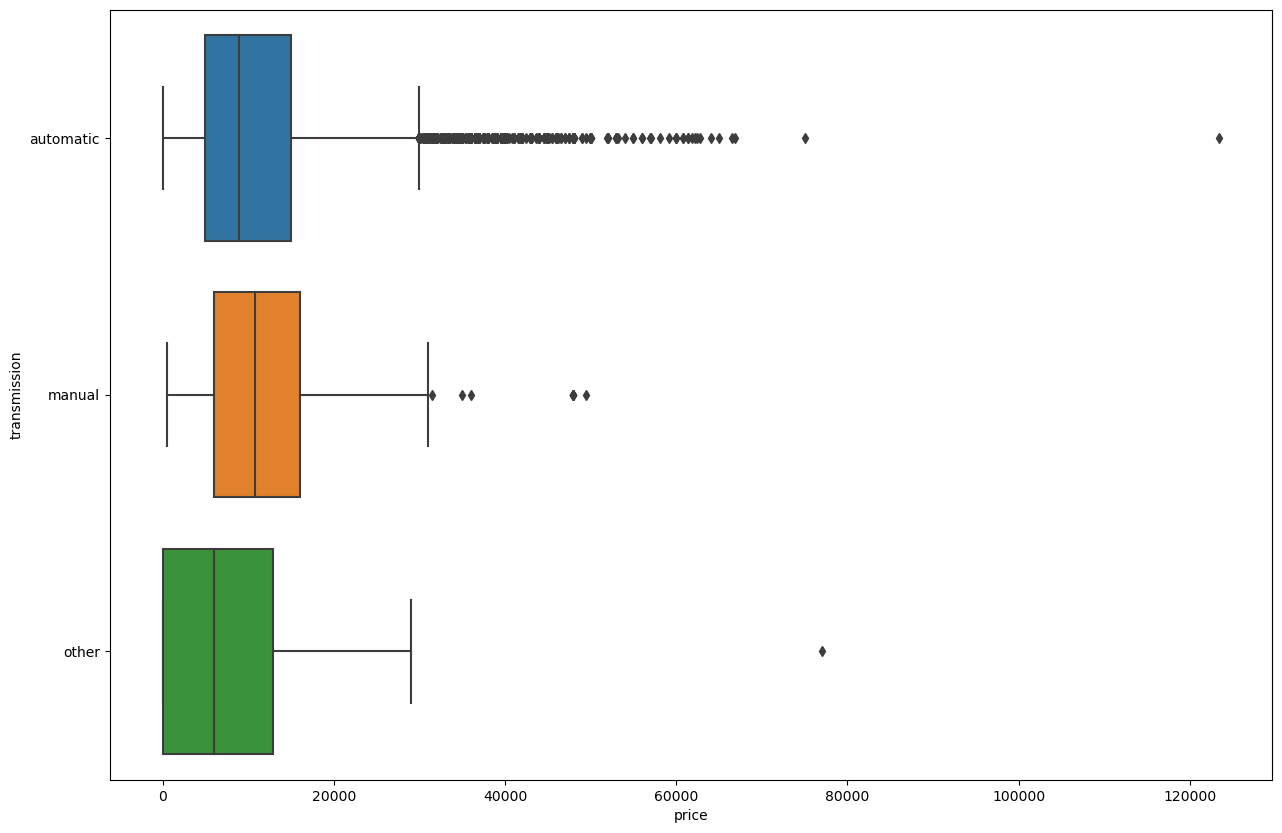

In [35]:
#meilhat apakah ada outlier atau tidak untuk rata-rata harga mobil suv berdasarkan outlier
plt.figure(figsize=(15,10))
sns.boxplot(data=data_suv,x='price',y='transmission')

#### analisis kendaraan paling banyak di situs iklan ke-2 (Truck)

In [36]:
data_truck

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days,month,year,car_age,travel_avg
22,7500,2004,chevrolet silverado,4,8.0,gas,180000.0,automatic,truck,red,1,2019-01-05,64,5,1,2019,15,12000.000000
39,8000,2009,ford f-150,2,8.0,gas,234000.0,automatic,truck,black,1,2019-03-31,1,31,3,2019,10,23400.000000
50,6200,2006,ford f-150,3,6.0,gas,69698.0,automatic,truck,custom,0,2018-05-03,50,3,5,2018,12,5808.166667
53,10400,2012,chevrolet colorado,3,5.0,gas,111871.0,automatic,truck,red,1,2019-01-30,27,30,1,2019,7,15981.571429
60,13000,2005,ram 1500,2,8.0,gas,146000.0,automatic,truck,grey,1,2019-03-14,26,14,3,2019,14,10428.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51487,1495,2011,ford f-150,1,6.0,gas,15804.0,manual,truck,white,1,2018-09-18,56,18,9,2018,7,2257.714286
51488,21900,2013,chevrolet silverado 3500hd,3,8.0,diesel,203000.0,automatic,truck,white,1,2018-12-27,37,27,12,2018,5,40600.000000
51497,2995,2001,ford f150,2,8.0,gas,206257.0,automatic,truck,red,0,2018-12-02,12,2,12,2018,17,12132.764706
51498,15900,2011,gmc sierra 1500,3,8.0,gas,104230.0,automatic,truck,unknown,1,2019-01-25,69,25,1,2019,8,13028.750000


In [37]:
#melihat jumlah  truck berdasarkan warna nya yang ada pada data
data_truck.groupby('paint_color')['model'].count().reset_index().sort_values(by='model')

,paint_color,model
7,purple,16
6,orange,48
12,yellow,67
2,brown,253
4,green,278
3,custom,316
1,blue,881
5,grey,960
9,silver,1020
8,red,1061


<AxesSubplot:xlabel='price', ylabel='paint_color'>

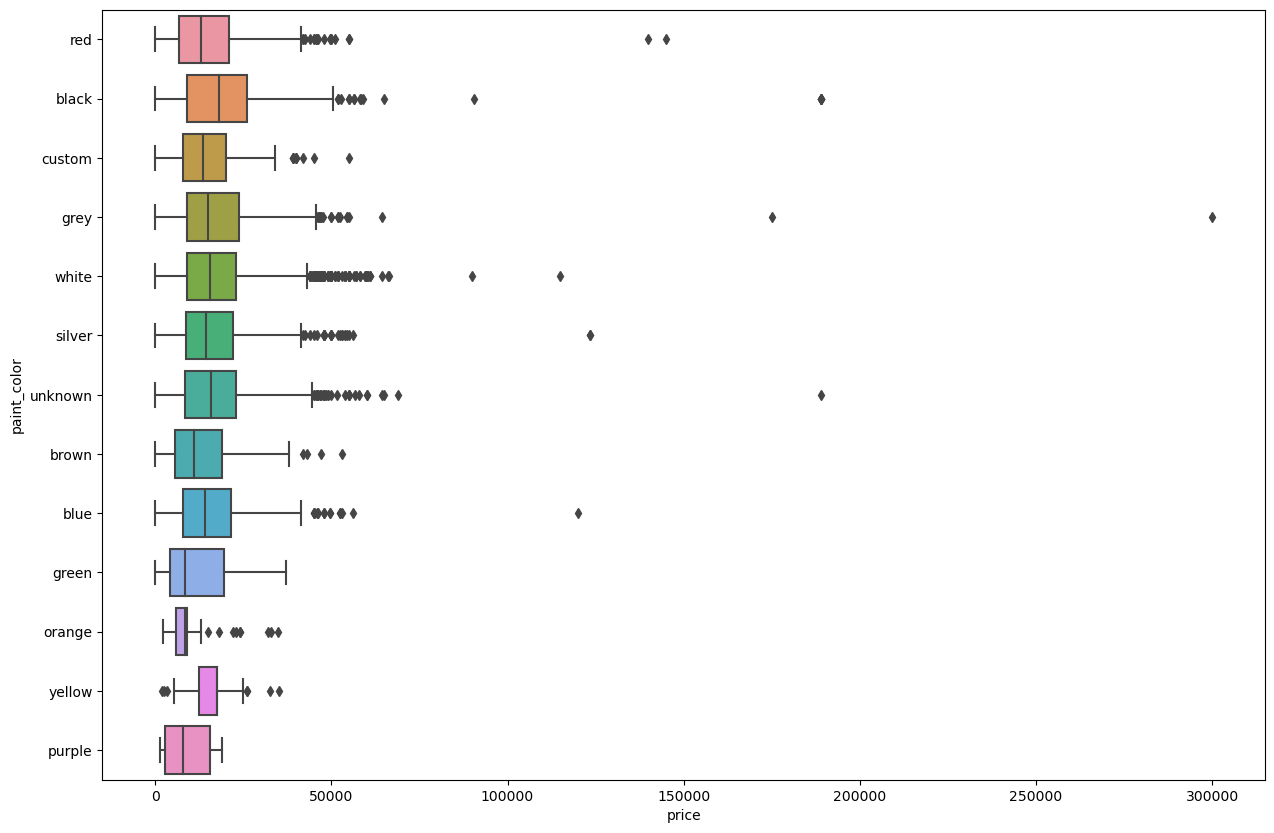

In [38]:
#melihat rata-rata penyebaran harga truck berdasarkan warna, dan melihat apakah ada data outlier atau tidak
plt.figure(figsize=(15,10))
sns.boxplot(data=data_truck,x='price',y='paint_color')

In [39]:
#melihat rata-rata harga truck berdasarkan transmisi
data_truck.groupby('transmission')['price'].mean()

transmission
automatic    17117.504059
manual       10554.173423
other         8320.165049
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='transmission'>

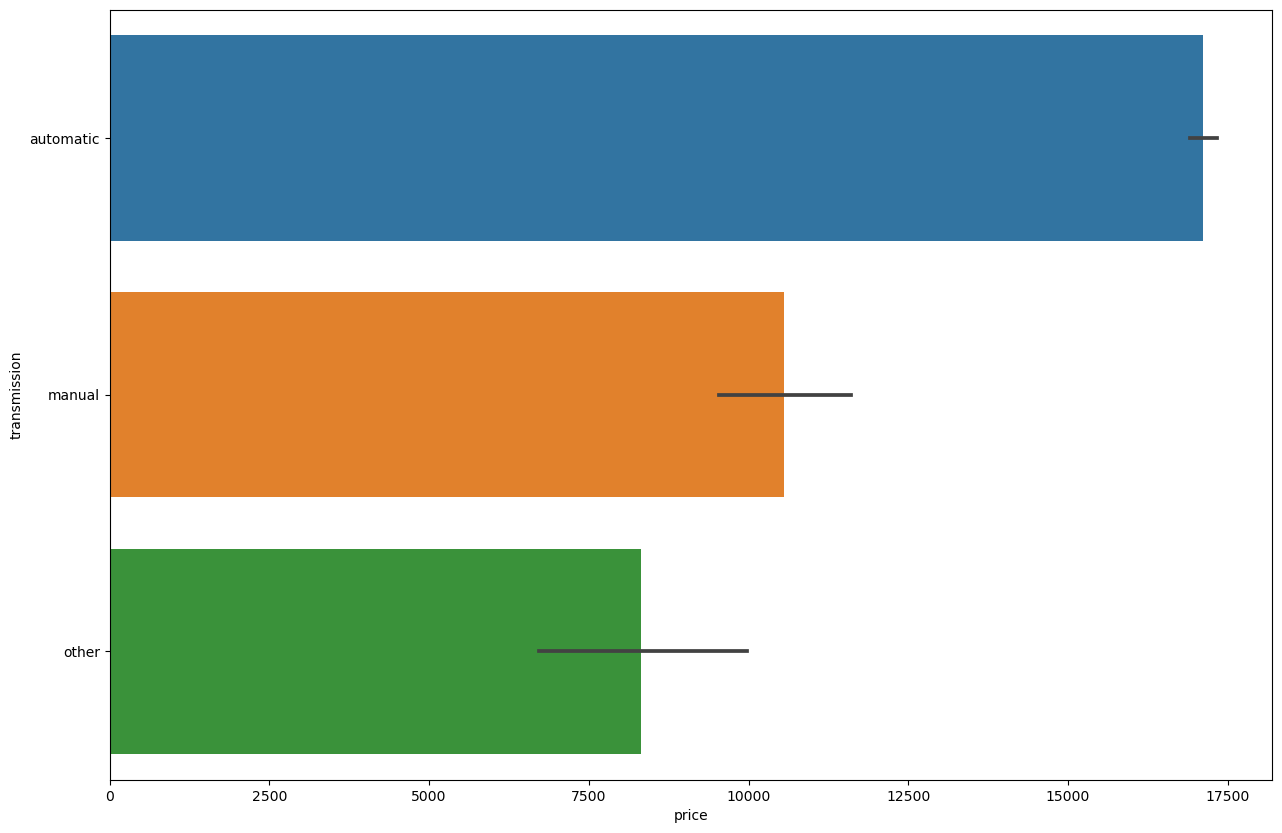

In [40]:
#melihat visualisasi data harga truck berdasarkan transmission
plt.figure(figsize=(15,10))
sns.barplot(data=data_truck,x='price',y='transmission')

### Analisis berdasarkan faktor lain(numerical faktor)

membuat scatter berdasarkan parameter tertentu di kendaraan yang paling banyak jumlah iklannya di situ

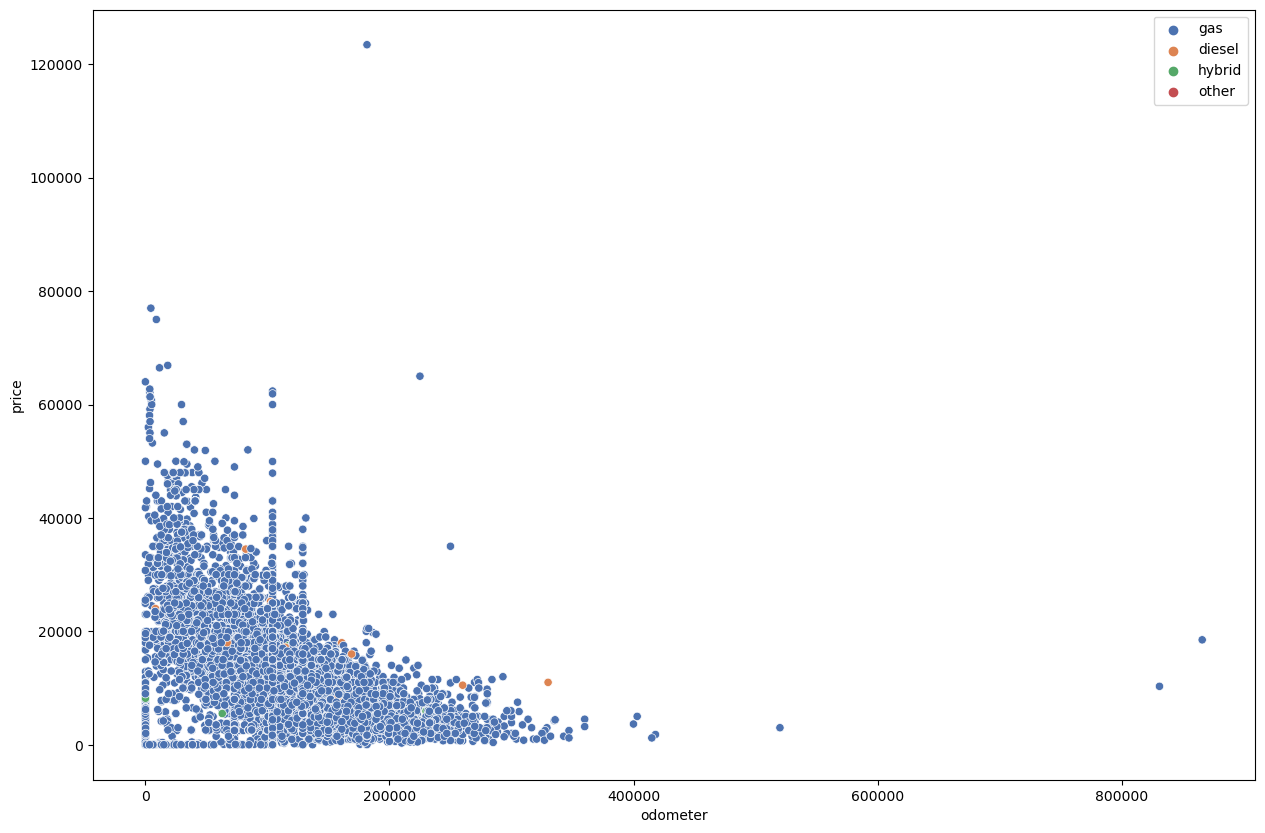

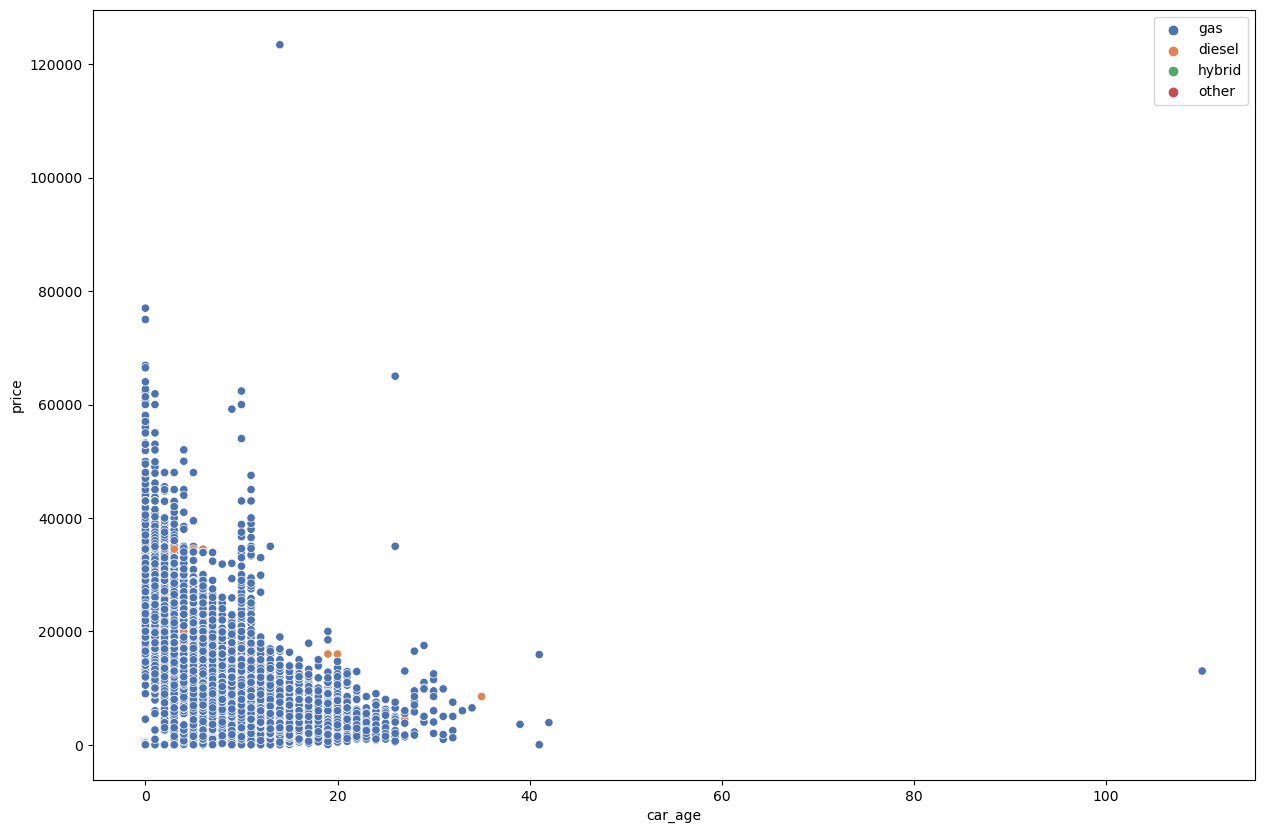

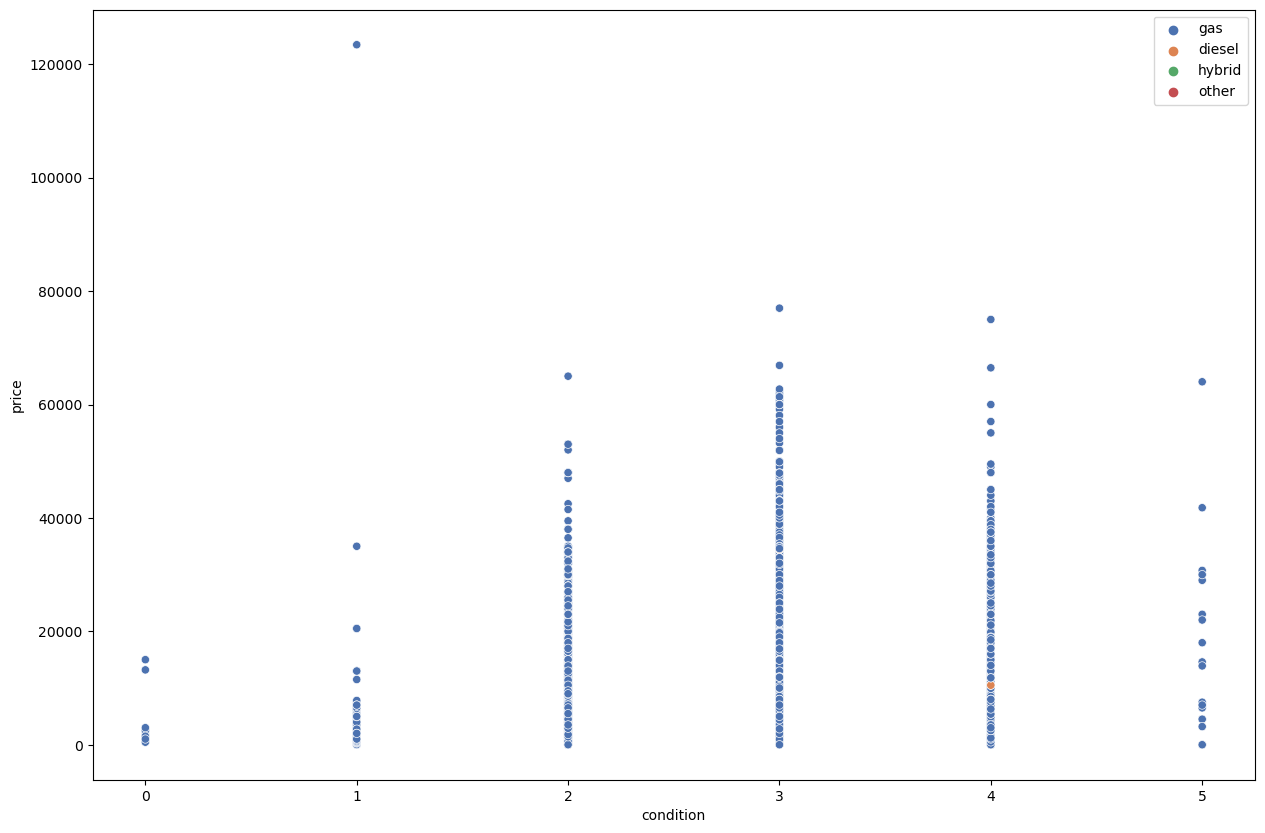

In [41]:
#Menggunakan data kendaraan bertipe suv
param2 = ['odometer','car_age','condition']
for i in param2:
    plt.figure(figsize=(15,10))
    sns.scatterplot(data=data_suv,x=i,y='price',hue='fuel',palette='deep')
    plt.legend()
    


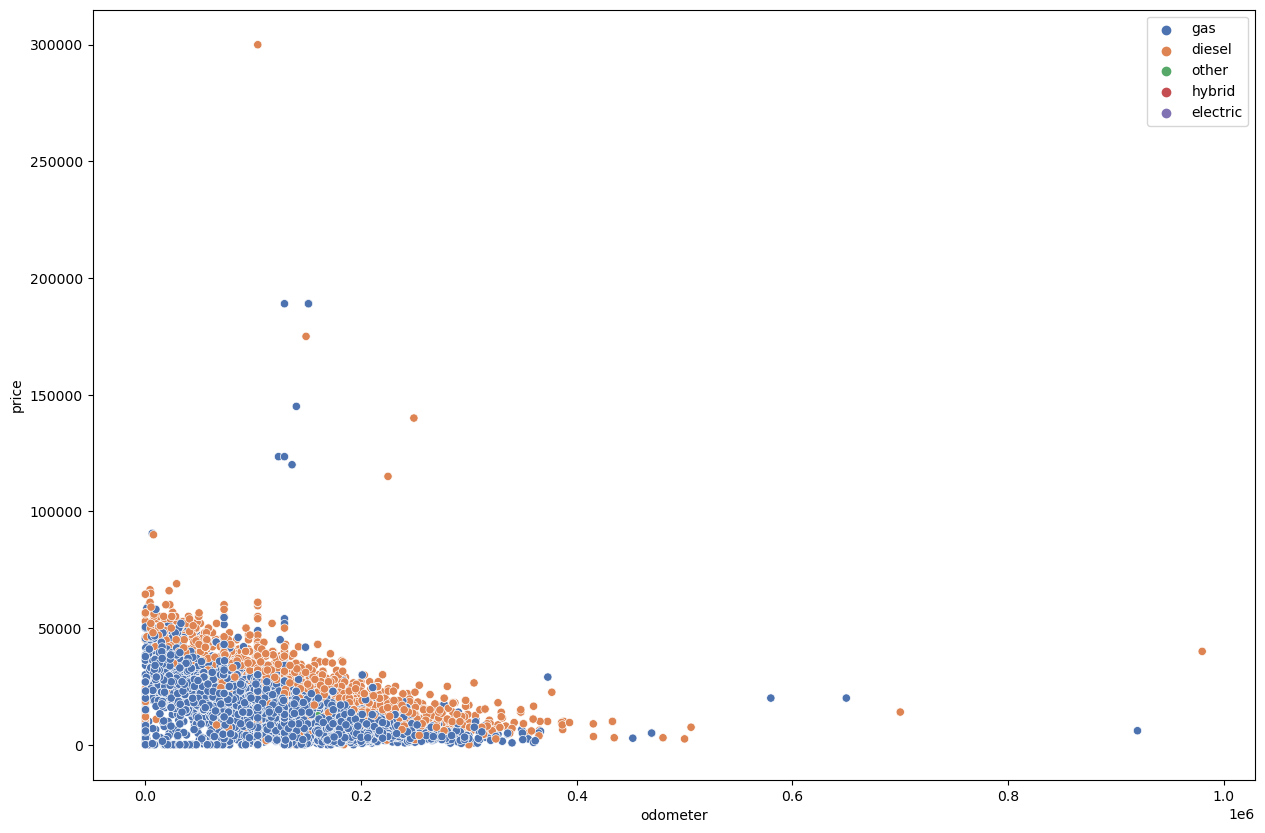

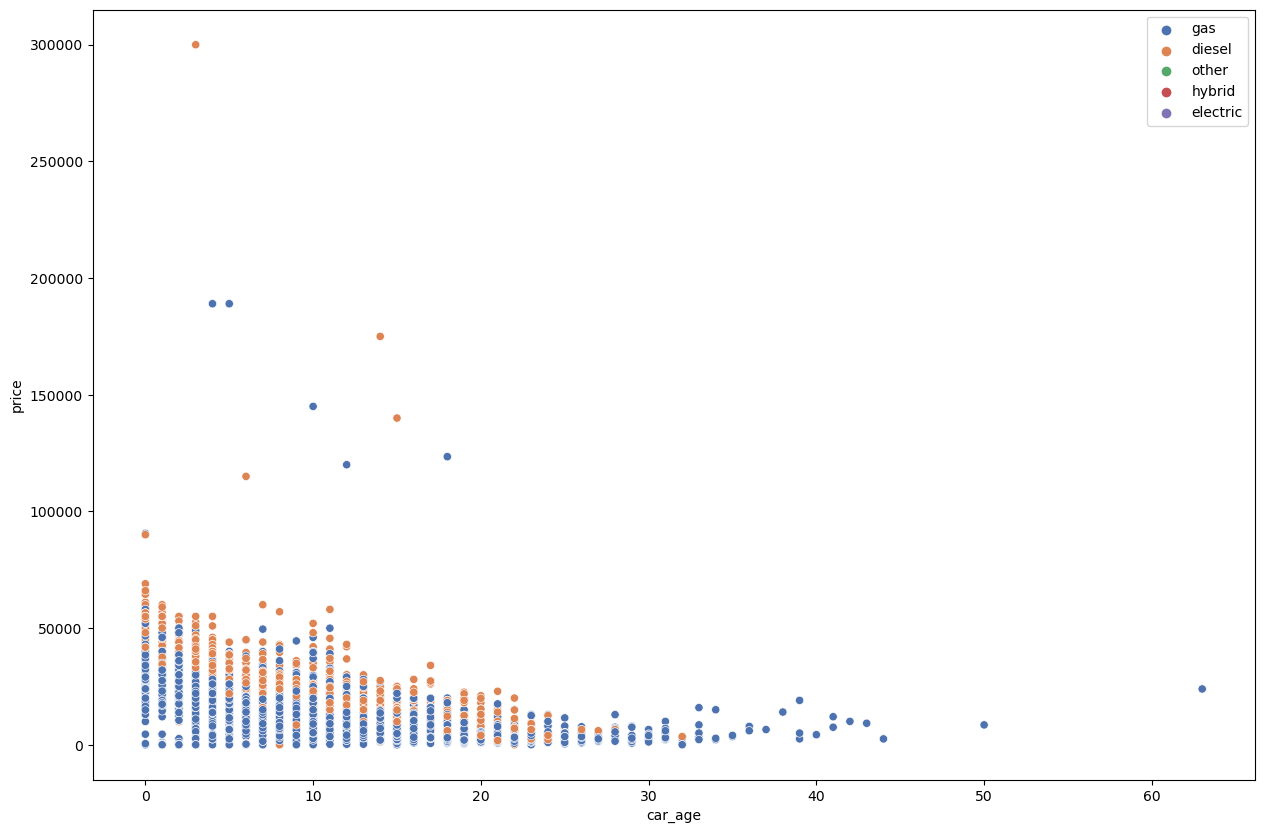

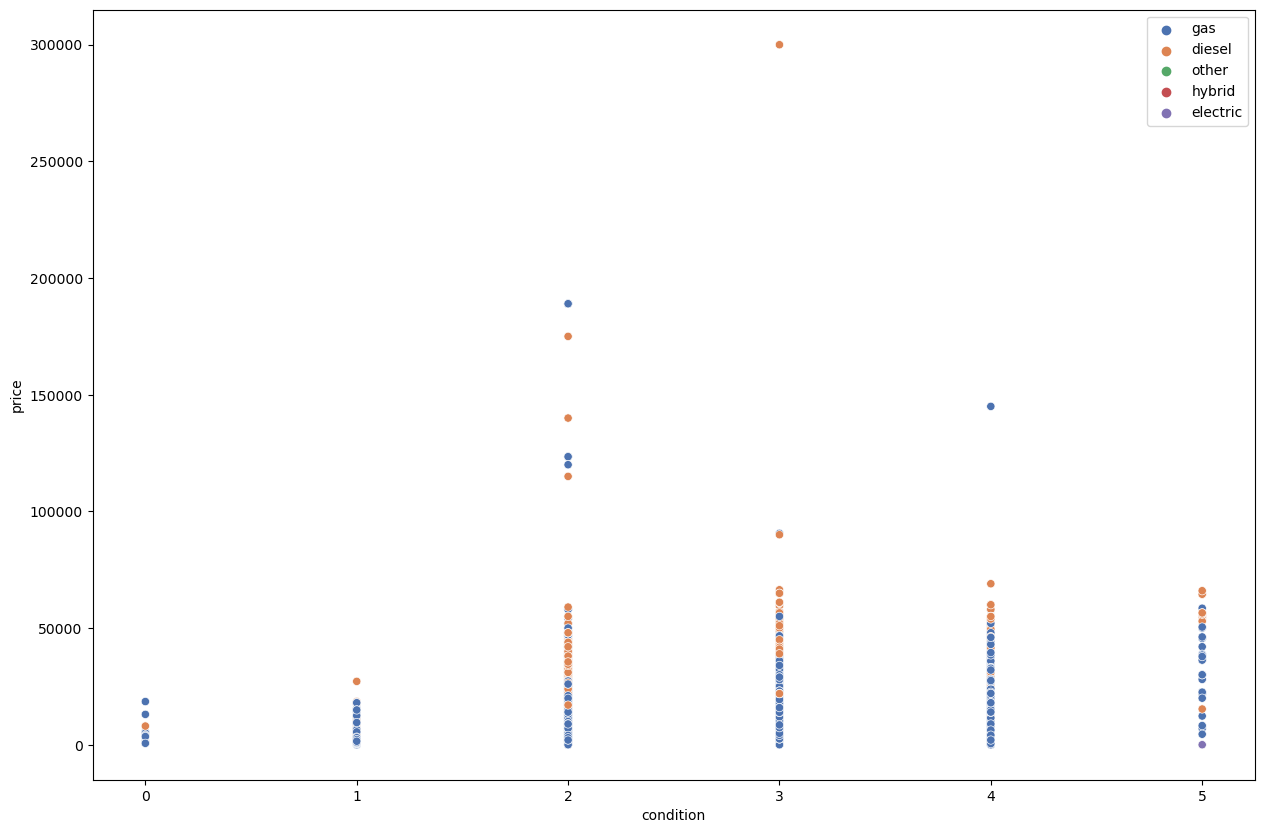

In [42]:
#Menggunakan data kendaraan bertipe truck
param2 = ['odometer','car_age','condition']
for i in param2:
    plt.figure(figsize=(15,10))
    sns.scatterplot(data=data_truck,x=i,y='price',hue='fuel',palette='deep')
    plt.legend()

# Kesimpulan

    1. Pada situs iklan jual beli mobil ini jenis mobil yang paling banyak memasang iklan adalah jenis SUV dan diikuti jenis Truck
    2. Jenis suv yang paling banyak penyebarann warnanya adalah putih sedangkan pada truck berwarna hitam
    3. Untuk jenis kategori(warna,transmission,fuel) ternyata berpengaruh pada harga kendaraan. misalnya pada tipe suv untuk warna mobil yang paling mahal adalah suv berwarna abu- abu, untuk transmission automatic lebih bagus harganya dibanding yang lain dan untuk fuel bertipe gas harganya juga paling bagus dibanding tipe fuel lain
    4. disitus ini kebanyakan mobil suv dijual dengan odometer 0-35000, rentan harganya paling banyak ada dikisaran 0-80000 
    5. umur mobil juga berpengaruh dengan harga jual mobil, ditunjukkan pada harga suv semakin muda umur kendaraan harganya relatif lebih tinggi dibanding yang umurnya sudah tua, ummur mobil yang sudah tua tidak berani dijual dengan harga tinggi pada situs ini
    6. untuk kondisi mobil juga berpengaruh pada harga juga, untuk kategori mobil 0:salvage , 1:fair harganya tidak teralu tinggi malah dibawah dibanding dengan kondisi lainnya yang harganya dikisaran 0-10000. sedangkan dengan kondisi selain itu harganya di kisaran 0-20000
    7. untuk harga kendaraan ternyata dipengaruhi oleh banyak faktor selain faktor numerik seperti odometer, car_age, cylinder, ternyata faktor seperti warna mobil, transmission juga berpengaruh pada harga jual mobil
    8. untuk rata-rata paling tinggi pada situs iklan ini adalah kendaraan jenis bus rata-rata harga jualnya paling bagus disini tetapi agak jeleknya model bus yang ada disini terbatas/ jumlahnya tidak banyak
   